In [13]:
import cv2
import glob
import numpy as np
from matplotlib import pyplot as plt

images=glob.glob('camera_cal/calibration*.jpg')

#camera calibration
nx=9
ny=6
objpoints = []
imgpoints = []

objp=np.zeros((nx*ny,3),np.float32)
objp[:,:2]=np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coord
#find points
for fname in images:
    img=cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret==True:
        imgpoints.append(corners)
        objpoints.append(objp)

#calibrate
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

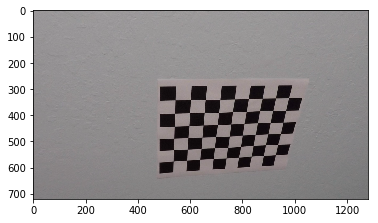

In [18]:
#undistord example
img=cv2.imread(images[1])
undist = cv2.undistort(img, mtx, dist, None, mtx)
plt.figure
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img)